In [27]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from os import listdir
from os.path import isfile, join
from PIL import Image

import gdown as gdown
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import torch
import torch.nn as nn
import torchvision
from torchvision import transforms, datasets
import torch.nn.functional as F
from torch.utils.data import DataLoader,Dataset
from torchvision.transforms.transforms import Normalize

In [135]:
from Models.Models import *

In [22]:
PATH = os.getcwd()
charToASCII = {'0': 48, '1': 49, '2': 50, '3': 51, '4': 52, '5': 53, '6': 54, '7': 55, '8': 56, '9': 57, 'A': 65, 'B': 66, 'C': 67, 'D': 68, 'E': 69, 'F': 70, 'G': 71, 'H': 72, 'I': 73, 'J': 74, 'K': 75, 'L': 76, 'M': 77, 'N': 78, 'O': 79, 'P': 80, 'Q': 81, 'R': 82, 'S': 83, 'T': 84, 'U': 85, 'V': 86, 'W': 87, 'X': 88, 'Y': 89, 'Z': 90, 'a': 97, 'b': 98, 'c': 99, 'd': 100, 'e': 101, 'f': 102, 'g': 103, 'h': 104, 'i': 105, 'j': 106, 'k': 107, 'l': 108, 'm': 109, 'n': 110, 'o': 111, 'p': 112, 'q': 113, 'r': 114, 's': 115, 't': 116, 'u': 117, 'v': 118, 'w': 119, 'x': 120, 'y': 121, 'z': 122}
ASCIIToChar = {48: '0', 49: '1', 50: '2', 51: '3', 52: '4', 53: '5', 54: '6', 55: '7', 56: '8', 57: '9', 65: 'A', 66: 'B', 67: 'C', 68: 'D', 69: 'E', 70: 'F', 71: 'G', 72: 'H', 73: 'I', 74: 'J', 75: 'K', 76: 'L', 77: 'M', 78: 'N', 79: 'O', 80: 'P', 81: 'Q', 82: 'R', 83: 'S', 84: 'T', 85: 'U', 86: 'V', 87: 'W', 88: 'X', 89: 'Y', 90: 'Z', 97: 'a', 98: 'b', 99: 'c', 100: 'd', 101: 'e', 102: 'f', 103: 'g', 104: 'h', 105: 'i', 106: 'j', 107: 'k', 108: 'l', 109: 'm', 110: 'n', 111: 'o', 112: 'p', 113: 'q', 114: 'r', 115: 's', 116: 't', 117: 'u', 118: 'v', 119: 'w', 120: 'x', 121: 'y', 122: 'z'}
classes = 62
PATH_DATASET = "E:\\Handwritten Dataset\\by_class\\" #Path to dataset
mapIndex = {}
i = 0
for key in ASCIIToChar.keys():
    mapIndex[key] = i
    i += 1
print(mapIndex)

{48: 0, 49: 1, 50: 2, 51: 3, 52: 4, 53: 5, 54: 6, 55: 7, 56: 8, 57: 9, 65: 10, 66: 11, 67: 12, 68: 13, 69: 14, 70: 15, 71: 16, 72: 17, 73: 18, 74: 19, 75: 20, 76: 21, 77: 22, 78: 23, 79: 24, 80: 25, 81: 26, 82: 27, 83: 28, 84: 29, 85: 30, 86: 31, 87: 32, 88: 33, 89: 34, 90: 35, 97: 36, 98: 37, 99: 38, 100: 39, 101: 40, 102: 41, 103: 42, 104: 43, 105: 44, 106: 45, 107: 46, 108: 47, 109: 48, 110: 49, 111: 50, 112: 51, 113: 52, 114: 53, 115: 54, 116: 55, 117: 56, 118: 57, 119: 58, 120: 59, 121: 60, 122: 61}


In [69]:
chars = []
for i in range(classes):
    chars.append([])

transformToTensor = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((28,28)),
    transforms.ToTensor()
])

for class_id in ASCIIToChar.keys():
    PATH_CLASS = PATH_DATASET + str(hex(class_id))[2:] + "\\train_" + str(hex(class_id))[2:] + "\\"
    for file in listdir(PATH_CLASS):
        img = Image.open(PATH_CLASS + file)
        tensor = transformToTensor(img)
        labels_v = np.zeros(classes, dtype=np.float32)
        labels_v[mapIndex[class_id]] = 1
        chars[mapIndex[class_id]].append((tensor, torch.tensor(labels_v)))
    print("End", ASCIIToChar[class_id],":",len(chars[mapIndex[class_id]]),"elements")

End 0 : 34803 elements
End 1 : 38049 elements
End 2 : 34184 elements
End 3 : 35293 elements
End 4 : 33432 elements
End 5 : 31067 elements
End 6 : 34079 elements
End 7 : 35796 elements
End 8 : 33884 elements
End 9 : 33720 elements
End A : 7010 elements
End B : 4091 elements
End C : 11315 elements
End D : 4945 elements
End E : 5420 elements
End F : 10203 elements
End G : 2575 elements
End H : 3271 elements
End I : 13179 elements
End J : 3962 elements
End K : 2473 elements
End L : 5390 elements
End M : 10027 elements
End N : 9149 elements
End O : 28680 elements
End P : 9277 elements
End Q : 2566 elements
End R : 5436 elements
End S : 23827 elements
End T : 10927 elements
End U : 14146 elements
End V : 4951 elements
End W : 5026 elements
End X : 2731 elements
End Y : 5088 elements
End Z : 2698 elements
End a : 11196 elements
End b : 5551 elements
End c : 2792 elements
End d : 11421 elements
End e : 28299 elements
End f : 2493 elements
End g : 3839 elements
End h : 9713 elements
End i : 278

In [72]:
n_total = 0
for lista in chars:
    n_total += len(lista)
print(n_total)

train_set = []
validation_set = []
test_set = []
for lista in chars:
    n = len(lista)
    n_train = int(0.8*n)
    n_validation = int(0.1*n)
    for i in range(n_train):
        train_set.append(lista[i])
    for i in range(n_train, n_train + n_validation):
        validation_set.append(lista[i])
    for i in range(n_train + n_validation, n):
        test_set.append(lista[i])

print("train set length:", len(train_set))
print("validation set length:", len(validation_set))
print("test set length:", len(test_set))
print("set type:", type(train_set))
print("data set type:", type(train_set[0]))
a, b = train_set[0] 
print("first data set type:", type(a))
print("first data shape:", a.shape)
print("second data set type:", type(b))
print("second data shape:", b.shape)

731668
train set length: 585308
validation set length: 73139
test set length: 73221
set type: <class 'list'>
data set type: <class 'tuple'>
first data set type: <class 'torch.Tensor'>
first data shape: torch.Size([1, 28, 28])
second data set type: <class 'torch.Tensor'>
second data shape: torch.Size([62])


In [74]:
batch_size = 64

train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_set, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=batch_size, shuffle=True)

In [75]:
def train(model, train_loader, Epochs, loss_fn):
    train_loss_avg = []
    validation_loss_avg = []
    
    for epoch in range(Epochs):
        model.train()

        train_loss_avg.append(0)
        num_batches = 0
        total = 0
        correct = 0

        for image_batch, label_batch in train_loader:
            image_batch = image_batch.to(device)
            label_batch = label_batch.to(device)
            
            label_batch_pred = model(image_batch)
            loss = loss_fn(label_batch_pred, label_batch)

            _, test = torch.max(label_batch.data, 1)
            _, predicted = torch.max(label_batch_pred.data, 1)
            total += label_batch.size(0)
            correct += (predicted == test).sum().item()
            
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            train_loss_avg[-1] += loss.item()
            num_batches += 1

        train_loss_avg[-1] /= num_batches
        train_accuracy = 100.0 * correct / total 

        validation_loss_avg.append(0)
        num_batches = 0
        total = 0
        correct = 0

        model.eval()

        with torch.no_grad():
            for image_batch, label_batch in validation_loader:
                image_batch = image_batch.to(device)
                label_batch = label_batch.to(device)
            
                label_batch_pred = model(image_batch)
                loss = loss_fn(label_batch_pred, label_batch)

                _, test = torch.max(label_batch.data, 1)
                _, predicted = torch.max(label_batch_pred.data, 1)
                total += label_batch.size(0)
                correct += (predicted == test).sum().item()

                validation_loss_avg[-1] += loss.item()
                num_batches += 1

        validation_loss_avg[-1] /= num_batches
        validation_accuracy = 100.0 * correct / total

        print(f'Epoch [{epoch+1} / {Epochs}] training error: {train_loss_avg[-1]:.4f}, training accuracy: {train_accuracy:.4f}%, validation error: {validation_loss_avg[-1]:.4f}, validation accuracy: {validation_accuracy:.4f}%')
      
    return train_loss_avg, validation_loss_avg

In [76]:
def training_model(model, epoch, loss, optimizer, train_loader):
    training_loss, validation_loss = train(model,train_loader,epoch,loss)
    
    fig = plt.figure()
    plt.plot(training_loss, label = 'Training Loss')
    plt.plot(validation_loss, label = 'Validation Loss')
    plt.title("Loss graphic")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [77]:
def testing_model(model, test_loader):
    model.eval()

    correct = 0
    total = 0
    with torch.no_grad():
        for image_batch, label_batch in test_loader:
            image_batch = image_batch.to(device)

            label_batch_pred = model(image_batch)

            image_batch = image_batch.to('cpu')
            label_batch_pred = label_batch_pred.to('cpu')

            _, test = torch.max(label_batch.data, 1)
            _, predicted = torch.max(label_batch_pred.data, 1)
            total += label_batch.size(0)
            correct += (predicted == test).sum().item()
    print(f'Total tested: {total}')
    print(f'Correct tested: {correct}')
    print(f'Accuracy: {(100.0 * correct / total):.4f} %')

In [85]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [104]:
class Lenet5(nn.Module):
    def __init__(self):
        super(Lenet5, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
            nn.Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1), padding=(0, 0)),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
            nn.Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1), padding=(0, 0)),
            nn.AdaptiveAvgPool2d(output_size=(1, 1))
        )
        self.classifier = nn.Sequential(
            nn.Linear(in_features=120, out_features=84, bias=True),
            nn.ReLU(inplace = True),
            nn.Linear(in_features=84, out_features=62, bias=True),
         )
        
    def forward(self, image):
        out = self.features(image)
        out = out.view(out.size(0), -1)
        out = self.classifier(out)
        return out

Epoch [1 / 20] training error: 0.7201, training accuracy: 78.7679%, validation error: 0.6577, validation accuracy: 78.6065%
Epoch [2 / 20] training error: 0.4355, training accuracy: 86.1613%, validation error: 0.6577, validation accuracy: 77.2256%
Epoch [3 / 20] training error: 0.3953, training accuracy: 87.2231%, validation error: 0.6352, validation accuracy: 78.9278%
Epoch [4 / 20] training error: 0.3746, training accuracy: 87.8117%, validation error: 0.6173, validation accuracy: 79.2559%
Epoch [5 / 20] training error: 0.3614, training accuracy: 88.1666%, validation error: 0.6174, validation accuracy: 79.3065%
Epoch [6 / 20] training error: 0.3514, training accuracy: 88.4322%, validation error: 0.6121, validation accuracy: 78.7418%
Epoch [7 / 20] training error: 0.3453, training accuracy: 88.6470%, validation error: 0.6006, validation accuracy: 79.0454%
Epoch [8 / 20] training error: 0.3384, training accuracy: 88.8319%, validation error: 0.6132, validation accuracy: 78.3659%
Epoch [9

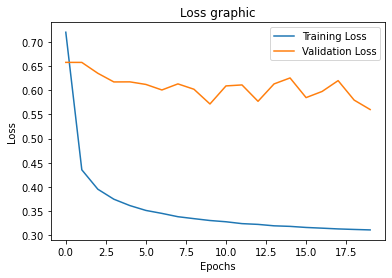

In [105]:
model = Lenet5()
model.to(device)
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001, weight_decay=1e-5)
training_model(model, 20, loss, optimizer, train_loader)

In [107]:
testing_model(model, test_loader)

Total tested: 73221
Correct tested: 57732
Accuracy: 78.8462 %


In [108]:
torch.save(model, PATH + '/Lenet5.pt')

In [139]:
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2)),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
            nn.Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
            nn.Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace = True),
            nn.Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace = True),
            nn.Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(0, 0)),
            nn.AdaptiveAvgPool2d(output_size=(1, 1))
        )
        self.classifier = nn.Sequential(
            nn.Linear(in_features=256, out_features=128, bias=True),
            nn.ReLU(inplace = True),
            nn.Linear(in_features=128, out_features=128, bias=True),
            nn.ReLU(inplace = True),
            nn.Linear(in_features=128, out_features=62, bias=True)
         )

    def forward(self, image):
        out = self.features(image)
        out = out.view(out.size(0), -1)
        out = self.classifier(out)
        return out

Epoch [1 / 20] training error: 0.7280, training accuracy: 78.2263%, validation error: 0.6612, validation accuracy: 77.7478%
Epoch [2 / 20] training error: 0.4057, training accuracy: 87.0393%, validation error: 0.5908, validation accuracy: 79.1739%
Epoch [3 / 20] training error: 0.3692, training accuracy: 88.0728%, validation error: 0.6180, validation accuracy: 78.1430%
Epoch [4 / 20] training error: 0.3480, training accuracy: 88.6667%, validation error: 0.5805, validation accuracy: 78.7350%
Epoch [5 / 20] training error: 0.3352, training accuracy: 89.0471%, validation error: 0.5902, validation accuracy: 78.2168%
Epoch [6 / 20] training error: 0.3243, training accuracy: 89.3364%, validation error: 0.5772, validation accuracy: 80.4249%
Epoch [7 / 20] training error: 0.3164, training accuracy: 89.5674%, validation error: 0.5999, validation accuracy: 79.3858%
Epoch [8 / 20] training error: 0.3113, training accuracy: 89.7104%, validation error: 0.5861, validation accuracy: 79.4528%
Epoch [9

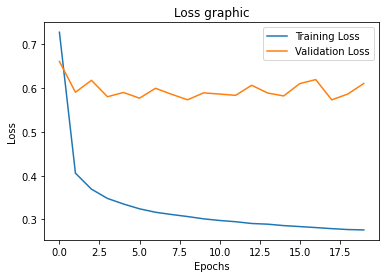

In [140]:
model = AlexNet()
model.to(device)
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001, weight_decay=1e-5)
training_model(model, 20, loss, optimizer, train_loader)

In [141]:
testing_model(model, test_loader)

Total tested: 73221
Correct tested: 57484
Accuracy: 78.5075 %


In [142]:
torch.save(model, PATH + '/AlexNet.pt')

In [109]:
mmm = torchvision.models.alexnet(pretrained=True)
print(mmm)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 